## Assignment #3 . See below for instructions.

1. Go to the site here: https://psl.noaa.gov/data/climateindices/list/ and pick a climate index. You can use pandas or numpy to read in the data. Remember to read the documentation for it!

2. Using your data, build a composite map for the relevant "phases" or conditions (positive, negative, neutral) for your index.

3. Plot the differences against neutral conditions. If your index doesn't have a neutral condition, make a comparison between positive and negative phases in your index.

4. Use an appropriate statistical test for your data and mark the regions in your differences map where the differences are statistically significant using stippling, hatching, or transparency.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data: 
- https://psl.noaa.gov/data/climateindices/list/
Using professor data for now.


In [2]:
file_nino34='/home/lortizur/clim680/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset> Size: 9kB
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 4kB ...
Data variables:
    sst      (time) float32 2kB ...

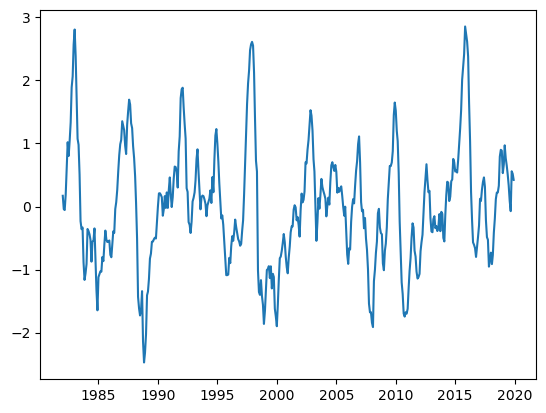

In [3]:
plt.plot(ds_nino34['time'],ds_nino34['sst'])

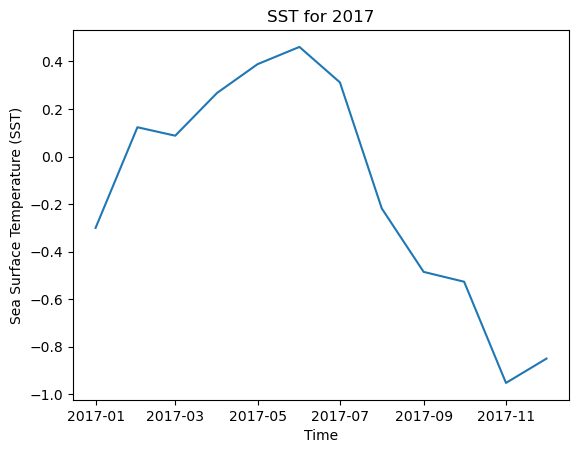

In [4]:
# Filter the dataset for 2017
ds_nino2017 = ds_nino34.sel(time=slice('2017-01-01', '2017-12-31'))

# Plotting
plt.plot(ds_nino2017['time'], ds_nino2017['sst'])
plt.title('SST for 2017')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (SST)')
plt.show()


El Nino:  0
Neutral:  9
La Nina:  3
[array(0), array(3), array(9)]


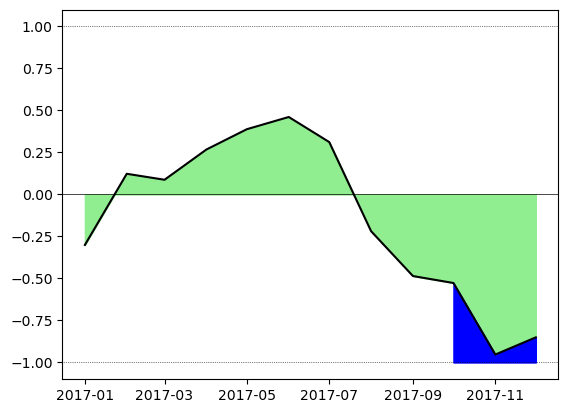

In [5]:
elnino=ds_nino2017['sst'].where(ds_nino2017['sst']>=0.5)
lanina=ds_nino2017['sst'].where(ds_nino2017['sst']<=-0.5)
neutral=ds_nino2017['sst'].where(np.logical_and(ds_nino2017['sst']>-0.5,
                                              ds_nino2017['sst']<0.5))

print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

plt.plot(ds_nino2017['time'],ds_nino2017['sst'],'k')
plt.fill_between(ds_nino2017['time'].values,ds_nino2017['sst'],color='lightgreen')
plt.fill_between(ds_nino2017['time'].values,elnino,y2=1.0,color='red')
plt.fill_between(ds_nino2017['time'].values,lanina,y2=-1.0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;

In [6]:
print (ds_nino2017)

<xarray.Dataset> Size: 240B
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 96B 2017-01-01 2017-02-01 ... 2017-12-01
    month    (time) int64 96B ...
Data variables:
    sst      (time) float32 48B -0.3005 0.1232 0.08758 ... -0.9528 -0.8505


## Data: Precipitation (2017)
 - https://psl.noaa.gov/data/gridded/data.cpc.globalprecip.html
-  https://downloads.psl.noaa.gov/Datasets/cpc_global_precip/precip.2017.nc

In [7]:
file='/scratch/dveronez/dveronez/diana_assig_2/precip.2017.nc'
ds_precip=xr.open_dataset(file)
ds_precip

<xarray.Dataset> Size: 378MB
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 2017-01-01 2017-01-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 378MB ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2018-01-02 23:30:40
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

In [8]:
print(ds_precip)

<xarray.Dataset> Size: 378MB
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 2017-01-01 2017-01-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 378MB ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2018-01-02 23:30:40
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...


In [9]:
print(ds_precip['time'])


<xarray.DataArray 'time' (time: 365)> Size: 3kB
array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', ..., '2017-12-29T00:00:00.000000000',
       '2017-12-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2017-01-01 2017-01-02 ... 2017-12-31
Attributes:
    long_name:           Time
    axis:                T
    standard_name:       time
    coordinate_defines:  start
    delta_t:             0000-00-01 00:00:00
    avg_period:          0000-00-01 00:00:00
    actual_range:        [1025616. 1034352.]


In [10]:
print(ds_nino34['time'][0].values, ds_nino34['time'][-1].values)
print(ds_nino2017['time'][0].values, ds_nino2017['time'][-1].values)
print(ds_precip['time'].values[0], ds_precip['time'].values[-1])


1982-01-01T00:00:00.000000000 2019-12-01T00:00:00.000000000
2017-01-01T00:00:00.000000000 2017-12-01T00:00:00.000000000
2017-01-01T00:00:00.000000000 2017-12-31T00:00:00.000000000


In [11]:
print(ds_precip['time'].min().values)
print(ds_precip['time'].max().values)


2017-01-01T00:00:00.000000000
2017-12-31T00:00:00.000000000


In [12]:
da_precip = ds_precip.sel(time=slice('2017-01-01', '2017-12-01'))
da_precip

<xarray.Dataset> Size: 347MB
Dimensions:  (lat: 360, lon: 720, time: 335)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 2017-01-01 2017-01-02 ... 2017-12-01
Data variables:
    precip   (time, lat, lon) float32 347MB ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2018-01-02 23:30:40
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

In [13]:
#da_climo = da_precip.groupby('time.month').mean()
da_climo = da_precip.groupby('time.month').mean(skipna=True)

da_anoms = da_precip.groupby('time.month')-da_climo
da_anoms

<xarray.Dataset> Size: 347MB
Dimensions:  (lat: 360, lon: 720, time: 335)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 2017-01-01 2017-01-02 ... 2017-12-01
    month    (time) int64 3kB 1 1 1 1 1 1 1 1 1 1 ... 11 11 11 11 11 11 11 11 12
Data variables:
    precip   (time, lat, lon) float32 347MB nan nan nan nan ... 0.0 0.0 0.0 0.0

In [14]:
elnino_2017 = elnino.sel(time=slice('2017-01-01', '2017-12-01'))
lanina_2017 = lanina.sel(time=slice('2017-01-01', '2017-12-01'))
neutral_2017 = neutral.sel(time=slice('2017-01-01', '2017-12-01'))


In [15]:
lanina_2017

<xarray.DataArray 'sst' (time: 12)> Size: 48B
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, -0.5269642,
       -0.9528427, -0.8504982], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 96B 2017-01-01 2017-02-01 ... 2017-12-01
    month    (time) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [16]:
elnino_precip = da_anoms.sel(time=elnino_2017.dropna(dim='time')['time']).mean(dim='time')
lanina_precip = da_anoms.sel(time=lanina_2017.dropna(dim='time')['time']).mean(dim='time')
neutral_precip = da_anoms.sel(time=neutral_2017.dropna(dim='time')['time']).mean(dim='time')

comp_precip = [elnino_precip,lanina_precip,neutral_precip]
comp_precip

[<xarray.Dataset> Size: 1MB
 Dimensions:  (lat: 360, lon: 720)
 Coordinates:
   * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
 Data variables:
     precip   (lat, lon) float32 1MB nan nan nan nan nan ... nan nan nan nan nan,
 <xarray.Dataset> Size: 1MB
 Dimensions:  (lat: 360, lon: 720)
 Coordinates:
   * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
 Data variables:
     precip   (lat, lon) float32 1MB nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0,
 <xarray.Dataset> Size: 1MB
 Dimensions:  (lat: 360, lon: 720)
 Coordinates:
   * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
 Data variables:
     precip   (lat, lon) float32 1MB nan nan nan ... -0.0005421 -0.0005

Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO 2017')

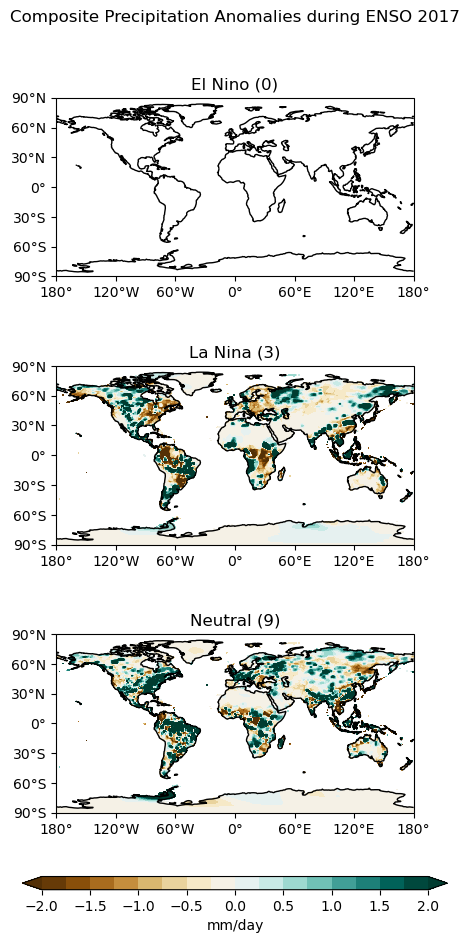

In [17]:
labels=['El Nino','La Nina', 'Neutral']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

# Loop over all of the ENSO phases and plot
for i, enso in enumerate(comp_precip):

    # Select the data as a DataArray, if it's in a Dataset
    data = enso.precip if isinstance(enso, xr.Dataset) else enso

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=data['lon'])

    # Contour plot
    #cs = axs[i].contourf(lons, data['lat'], data, clevs,
    cs = axs[i].contourf(lons, comp_precip[i]['lat'], data.filled(np.nan), clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='BrBG', extend='both')

        
    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the season
    axs[i].set_title(labels[i] + ' (' + str(counts[i]) + ')')

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO 2017')

In [18]:
# Loop over each precipitation anomaly dataset in comp_precip
for i, enso in enumerate(comp_precip):
    # If enso is a Dataset, extract the 'precip' DataArray
    if isinstance(enso, xr.Dataset):
        data = enso['precip']
    else:
        data = enso

    # Check the min and max values of the data
    print(f"Phase {labels[i]} - Min: {np.nanmin(data)} | Max: {np.nanmax(data)}")


Phase El Nino - Min: nan | Max: nan
Phase La Nina - Min: -15.766085624694824 | Max: 46.00173568725586
Phase Neutral - Min: -18.501291275024414 | Max: 28.013731002807617


/tmp/ipykernel_288373/345652338.py:10: RuntimeWarning: All-NaN axis encountered
  print(f"Phase {labels[i]} - Min: {np.nanmin(data)} | Max: {np.nanmax(data)}")


In [19]:
## calculate differences
diff_precip=[elnino_precip-neutral_precip, 
             lanina_precip-neutral_precip]

In [20]:
diff_precip

[<xarray.Dataset> Size: 1MB
 Dimensions:  (lat: 360, lon: 720)
 Coordinates:
   * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
 Data variables:
     precip   (lat, lon) float32 1MB nan nan nan nan nan ... nan nan nan nan nan,
 <xarray.Dataset> Size: 1MB
 Dimensions:  (lat: 360, lon: 720)
 Coordinates:
   * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
 Data variables:
     precip   (lat, lon) float32 1MB nan nan nan ... 0.0005421 0.0005417]

Text(0.5, 0.98, 'Composite Precipitation Differences during ENSO 2017')

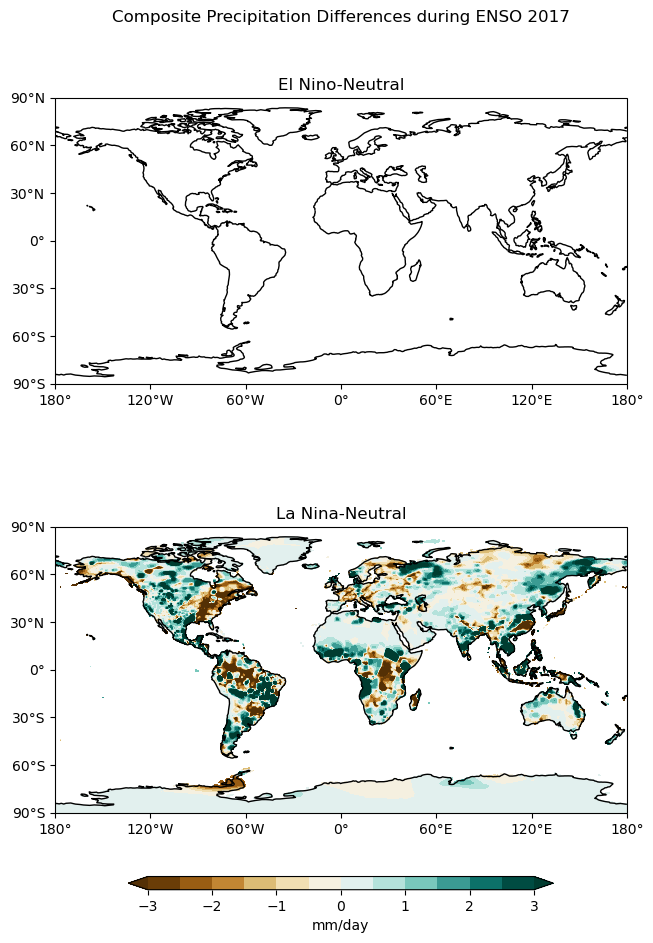

In [21]:
labels = ['El Nino-Neutral', 'La Nina-Neutral']
clevs = np.arange(-3, 3.5, 0.5)

# Define the figure and each axis for the 2 rows
fig, axs = plt.subplots(nrows=2, ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5, 11))

# axs is a 2-dimensional array of `GeoAxes`.
# We will flatten it into a 1-D array
axs = axs.flatten()

# Loop over all of the ENSO phases and plot
for i, enso in enumerate(diff_precip):

    # Select the data as a DataArray - important change
    data = enso if isinstance(enso, xr.DataArray) else enso.precip

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=data['lon'])

    # Now handle the data correctly, extract latitudes and longitudes
    if isinstance(data, xr.DataArray):
        lats = data['lat'].values  # Extract latitudes for plotting
    elif isinstance(data, np.ma.MaskedArray):
        lats = enso['lat'].values  # Use the latitude from the original enso dataset if data is a MaskedArray
    else:
        raise ValueError("Unsupported data type")

    # Contour plot
    cs = axs[i].contourf(lons, lats, data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='BrBG', extend='both')

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the season
    axs[i].set_title(labels[i])

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences during ENSO 2017')


In [28]:
p = 0.05 # 95% confidence level, or 5% likelihood that the result arose by chance
from scipy.stats import ttest_ind
elnino_precip_vals = da_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_precip_vals = da_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_precip_vals = da_anoms.sel(time=neutral.dropna(dim='time')['time'])

In [29]:
# Check for NaN values in the precipitation data
lanina_precip_vals = da_anoms['precip'].sel(time=lanina.dropna(dim='time')['time']).values.flatten()
neutral_precip_vals = da_anoms['precip'].sel(time=neutral.dropna(dim='time')['time']).values.flatten()

# Check if any of the arrays are empty or contain NaN values
print("La Niña Data: ", lanina_precip_vals[:10])  # Display the first 10 values for La Niña
print("Neutral Data: ", neutral_precip_vals[:10])  # Display the first 10 values for Neutral

# Remove NaN values from the data before performing the t-test
lanina_precip_vals = lanina_precip_vals[~np.isnan(lanina_precip_vals)]
neutral_precip_vals = neutral_precip_vals[~np.isnan(neutral_precip_vals)]

# Check if the arrays still have valid data after removing NaNs
print("La Niña Data after NaN removal: ", lanina_precip_vals[:10])
print("Neutral Data after NaN removal: ", neutral_precip_vals[:10])

# Perform t-test for La Niña vs Neutral again
tstat_lanina, pval_lanina = ttest_ind(
    lanina_precip_vals,
    neutral_precip_vals,
    equal_var=False
)

# Print the results
print("La Niña vs Neutral:")
print("t-statistic:", tstat_lanina)
print("p-value:", pval_lanina)

# Interpret the results
if pval_lanina < 0.05:
    print("The difference between La Niña and Neutral conditions is statistically significant.")
else:
    print("The difference between La Niña and Neutral conditions is not statistically significant.")


La Niña Data:  [nan nan nan nan nan nan nan nan nan nan]
Neutral Data:  [nan nan nan nan nan nan nan nan nan nan]
La Niña Data after NaN removal:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Neutral Data after NaN removal:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
La Niña vs Neutral:
t-statistic: -2.2784259224511256
p-value: 0.02270154015313339
The difference between La Niña and Neutral conditions is statistically significant.


In [30]:
tstat,pval = ttest_ind(lanina_precip_vals, 
                neutral_precip_vals, 
                equal_var = False)

In [32]:
#mask_diff = diff_precip[0].where(pval_lanina <= p)
mask_diff = diff_precip[0].where(pval <= p)
mask_diff

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
Data variables:
    precip   (lat, lon) float32 1MB nan nan nan nan nan ... nan nan nan nan nan

In [ ]:
## Plot our difference between composites and also mark where its significant

TypeError: 'GeoAxes' object is not subscriptable

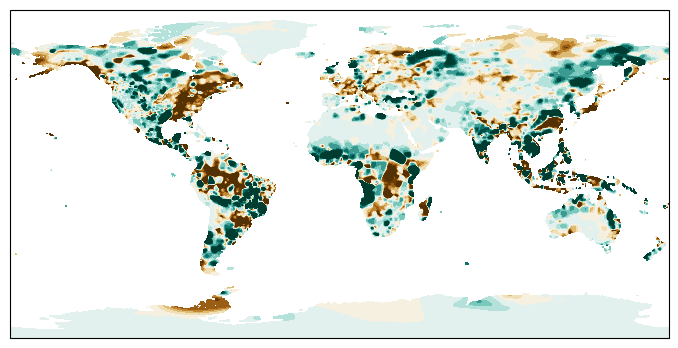

In [72]:
labels=["La Nina vs. Neutral"]
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

#Loop over all of the seasons and plot
for i, enso in enumerate(diff_precip):
    data=enso.precip if isinstance(enso, xr.Dataset) else enso
 

    # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=data['lon']) 
    #mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[1]['lon'])

    # Contour plot
    cs=axs.contourf(lons,diff_precip[i]['lat'],data.filled(np.nan),clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Overlay of stippling
ss=axs[i].contourf(lons,diff_precip[i]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['.',''],extend='both',alpha=0.0)

# Draw the coastines for each subplot
axs[i].coastlines()(zorder=3, color='grey')
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences La Nina-Neutral')

#plt.savefig('stats_ttest.png'

In [62]:
print(type(data))


<class 'numpy.ma.MaskedArray'>


In [64]:
print("Keys in diff_precip[i]:", diff_precip[i].keys())


Keys in diff_precip[i]: KeysView(<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
Data variables:
    precip   (lat, lon) float32 1MB nan nan nan ... 0.0005421 0.0005417)


In [66]:
print(diff_precip[i].coords)


Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8


In [70]:
import numpy as np
from cartopy.util import add_cyclic_point

for i, enso in enumerate(diff_precip):
    # Access the precipitation data
    data = enso.precip if isinstance(enso, xr.Dataset) else enso

    # Extract coordinates
    lons = diff_precip[i]['lon'].values
    lats = diff_precip[i]['lat'].values

    # Check and drop duplicate longitude if necessary
    if lons[-1] - lons[0] >= 360:
        lons = lons[:-1]
        data = data[..., :-1]

    # Manually add cyclic point to longitude and data
    lons = np.append(lons, lons[0] + 360)
    data = np.hstack([data, data[..., 0:1]])

    # Print shapes to verify alignment
    print(f"Data shape (after adding cyclic point): {data.shape}")
    print(f"Longitude shape: {lons.shape}")
    print(f"Latitude shape: {lats.shape}")

    # Handle masked values (convert to NaN if needed)
    if isinstance(data, np.ma.MaskedArray):
        data = data.filled(np.nan)

    # Create a significance mask
    significance_threshold = 1.0  # Adjust as needed
    mask_data = np.abs(data) > significance_threshold

    # Contour plot
    cs = ax.contourf(
        lons,
        lats,
        data,  # Now guaranteed to have NaN for missing values
        clevs,
        transform=ccrs.PlateCarree(),
        cmap='BrBG',
        extend='both'
    )

    # Overlay stippling for the mask
    ss = ax.contourf(
        lons,
        lats,
        mask_data,
        [0, 1],
        transform=ccrs.PlateCarree(),
        colors=['None'],
        hatches=['.', ''],
        extend='both',
        alpha=0.0
    )


Data shape (after adding cyclic point): (360, 721)
Longitude shape: (721,)
Latitude shape: (360,)
Data shape (after adding cyclic point): (360, 721)
Longitude shape: (721,)
Latitude shape: (360,)


In [73]:
print(f"Data min: {np.nanmin(data)}, Data max: {np.nanmax(data)}")
print(f"Data mean: {np.nanmean(data)}, Data shape: {data.shape}")


Data min: -26.927703857421875, Data max: 43.720367431640625
Data mean: -0.018024830147624016, Data shape: (360, 721)


In [74]:
print(f"Longitude shape: {lons.shape}, Latitude shape: {lats.shape}")
print(f"Data shape: {data.shape}")


Longitude shape: (721,), Latitude shape: (360,)
Data shape: (360, 721)


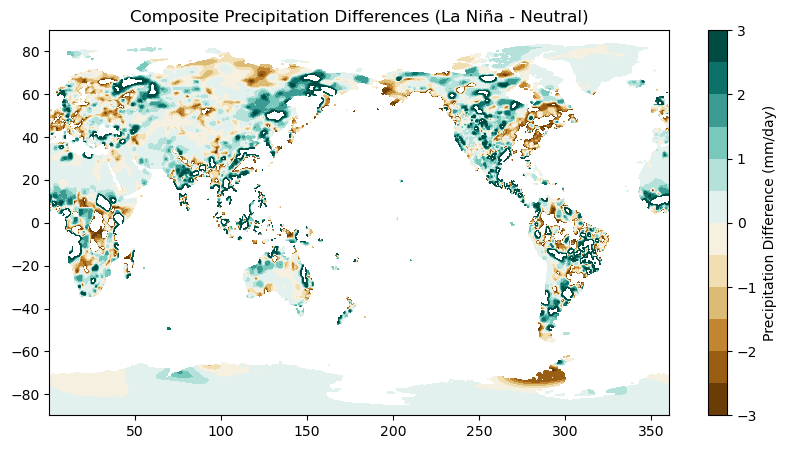

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.contourf(lons, lats, data, levels=clevs, cmap="BrBG")
plt.colorbar(label="Precipitation Difference (mm/day)")
plt.title("Composite Precipitation Differences (La Niña - Neutral)")
plt.show()


Data min: -26.927703857421875, max: 43.720367431640625, mean: -0.018024830147624016


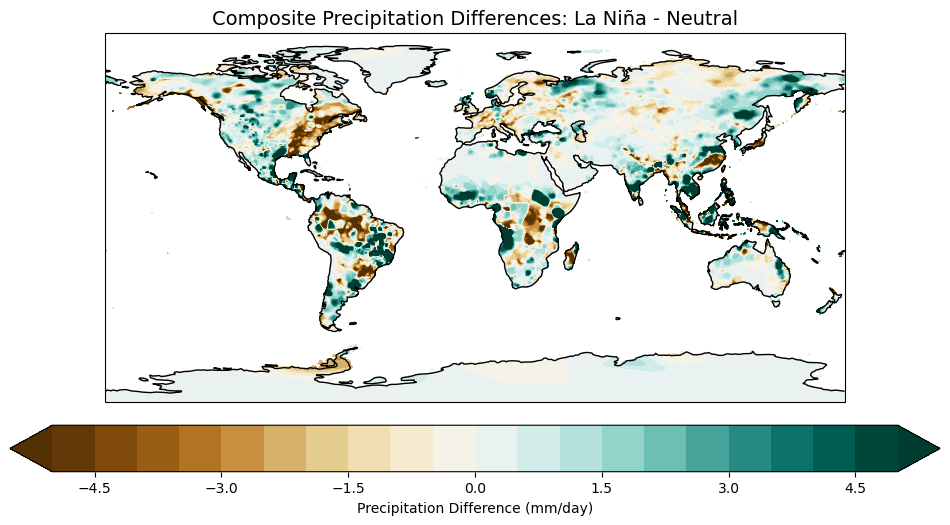

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

# Set levels for contouring
clevs = np.linspace(-5, 5, 21)  # Adjust range as needed

# Begin plotting
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(12, 6)
)

# Check data ranges and stats
print(f"Data min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

# Add cyclic point to data and longitudes for continuous plotting
data, lons = add_cyclic_point(data, coord=lons)

# Create contour plot for precipitation differences
cs = ax.contourf(
    lons,
    lats,
    data,
    levels=clevs,
    transform=ccrs.PlateCarree(),
    cmap='BrBG',
    extend='both'
)

# Add colorbar
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation Difference (mm/day)")

# Add map features
ax.coastlines()
ax.set_global()
ax.set_title("Composite Precipitation Differences: La Niña - Neutral", fontsize=14)

# Show plot
plt.show()


Data min: -26.927703857421875, max: 43.720367431640625, mean: -0.01682787761092186


/home/dveronez/miniforge/envs/climate/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


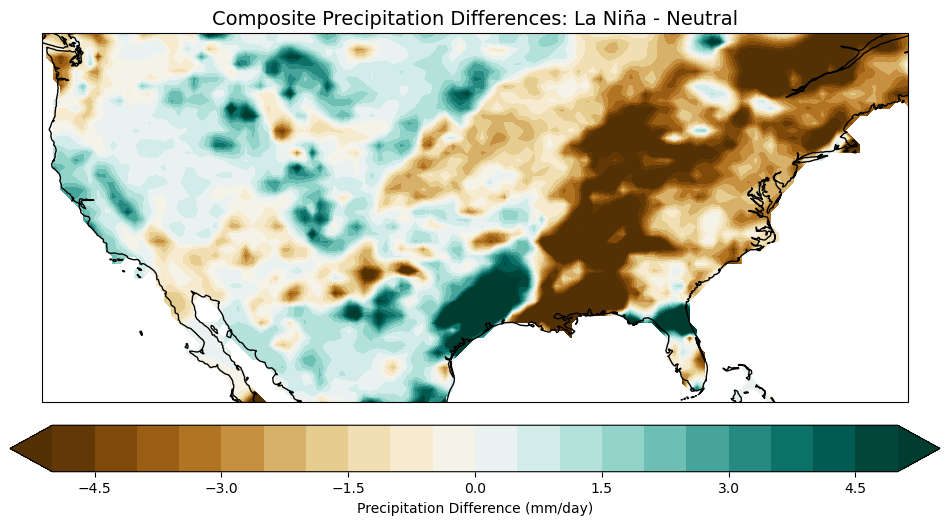

In [91]:
import numpy as np 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

# Set levels for contouring
clevs = np.linspace(-5, 5, 21)  # Adjust range as needed

# Begin plotting
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(12, 6)
)

# Check data ranges and stats
print(f"Data min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

# Add cyclic point to data and longitudes for continuous plotting
data, lons = add_cyclic_point(data, coord=lons)

# Create contour plot for precipitation differences
cs = ax.contourf(
    lons,
    lats,
    data,
    levels=clevs,
    transform=ccrs.PlateCarree(),
    cmap='BrBG',
    extend='both'
)

# Add colorbar
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation Difference (mm/day)")

# Add map features
ax.coastlines()

# Set extent to zoom into the U.S.
ax.set_extent([-125, -66.5, 24.396308, 49.384358], crs=ccrs.PlateCarree())  # U.S. bounds

# Title
ax.set_title("Composite Precipitation Differences: La Niña - Neutral", fontsize=14)

# Show plot
plt.show()


Data min: -26.927703857421875, max: 43.720367431640625, mean: -0.01668008416891098


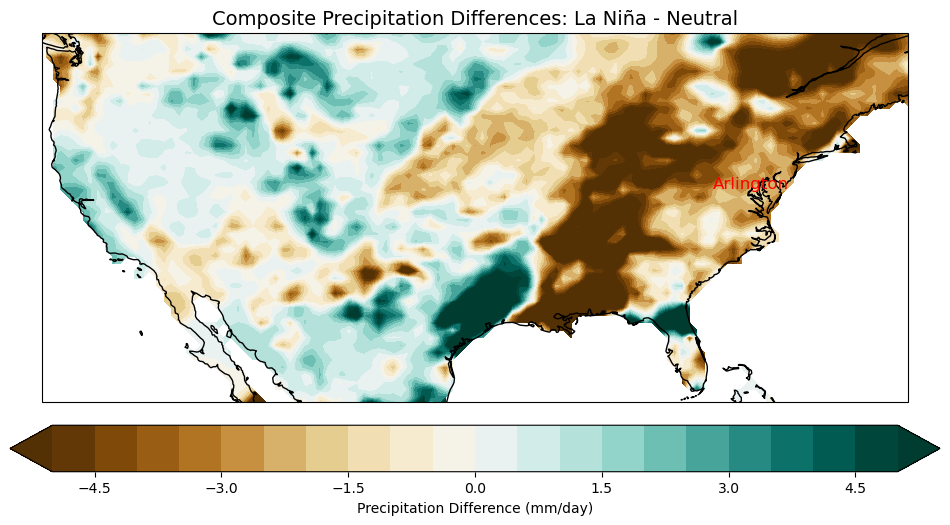

In [93]:
import numpy as np 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

# Set levels for contouring
clevs = np.linspace(-5, 5, 21)  # Adjust range as needed

# Begin plotting
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(12, 6)
)

# Check data ranges and stats
print(f"Data min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

# Add cyclic point to data and longitudes for continuous plotting
data, lons = add_cyclic_point(data, coord=lons)

# Create contour plot for precipitation differences
cs = ax.contourf(
    lons,
    lats,
    data,
    levels=clevs,
    transform=ccrs.PlateCarree(),
    cmap='BrBG',
    extend='both'
)

# Add colorbar
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation Difference (mm/day)")

# Add map features
ax.coastlines()

# Set extent to zoom into the U.S.
ax.set_extent([-125, -66.5, 24.396308, 49.384358], crs=ccrs.PlateCarree())  # U.S. bounds

# Title
ax.set_title("Composite Precipitation Differences: La Niña - Neutral", fontsize=14)

# Add Arlington label near the location
ax.text(-77.09, 38.89, 'Arlington', color='red', fontsize=12, ha='center', transform=ccrs.PlateCarree())

# Show plot
plt.show()
